<a href="https://colab.research.google.com/github/manjum2050/Telecom-Customer-Churn-Prediction/blob/master/Chrun_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [297]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#@title Install What-If Tool Widget and SHAP library
!pip install --upgrade --quiet witwidget shap

In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
import witwidget
import os
import pickle
import shap

import matplotlib.pyplot as plt
import seaborn as sns

from string import ascii_uppercase
from pandas import DataFrame

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

from sklearn.utils import shuffle
from tensorflow import keras

In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab_datasets/churn_dataset.csv')

In [301]:
list(df)

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [302]:
#Structure of the dataset
print(df.shape)

(7043, 21)


In [0]:
data = df.copy()

In [304]:
#Examining the missing values amd displaying the percentage of null values in each feature column

feature_names= list(data)
for i in feature_names:
    null_values = data[i].isnull().sum()
    nrow = data[i].count()
    missing_value_percent = (null_values/nrow)*100
    print(i +" " + ":" + " " + "Null_value_Percentage" + "=" + str(missing_value_percent) + "%","\n")
 

customerID : Null_value_Percentage=0.0% 

gender : Null_value_Percentage=0.0% 

SeniorCitizen : Null_value_Percentage=0.0% 

Partner : Null_value_Percentage=0.0% 

Dependents : Null_value_Percentage=0.0% 

tenure : Null_value_Percentage=0.0% 

PhoneService : Null_value_Percentage=0.0% 

MultipleLines : Null_value_Percentage=0.0% 

InternetService : Null_value_Percentage=0.0% 

OnlineSecurity : Null_value_Percentage=0.0% 

OnlineBackup : Null_value_Percentage=0.0% 

DeviceProtection : Null_value_Percentage=0.0% 

TechSupport : Null_value_Percentage=0.0% 

StreamingTV : Null_value_Percentage=0.0% 

StreamingMovies : Null_value_Percentage=0.0% 

Contract : Null_value_Percentage=0.0% 

PaperlessBilling : Null_value_Percentage=0.0% 

PaymentMethod : Null_value_Percentage=0.0% 

MonthlyCharges : Null_value_Percentage=0.0% 

TotalCharges : Null_value_Percentage=0.0% 

Churn : Null_value_Percentage=0.0% 



In [305]:
#Checking for Null values in the dataset
print(data.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [306]:
# From EDA we can see that the 'TotalCharges' feature column has few row values unspecified types
np.unique(data.TotalCharges.values)

array([' ', '100.2', '100.25', ..., '999.45', '999.8', '999.9'],
      dtype=object)

In [0]:
# Replacing the empty spaces with Null types
data = data.replace(r'^\s*$', np.nan, regex=True)

In [0]:
#Converting the column type for TotalCharges to Float types
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

In [309]:
#Checking the statistics of the column to decide wether to replace the missing value or drop the rows
data['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

shape: (7032, 21) 

['Yes', 'No'] [1869, 5163]


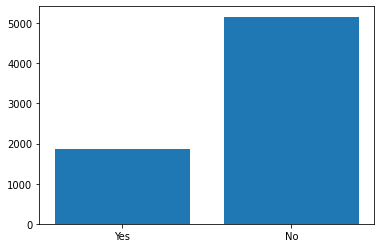

In [310]:
#Checking the Target feature 'Churn' after dropping the rows with missing values
data = data.dropna()
print("shape:",data.shape,"\n")
churn_list=['Yes','No']
Y = (data['Churn']=='Yes').sum()
N = (data['Churn']=='No').sum()
Heights=[Y,N]
print(churn_list,Heights)
plt.bar(churn_list, Heights);

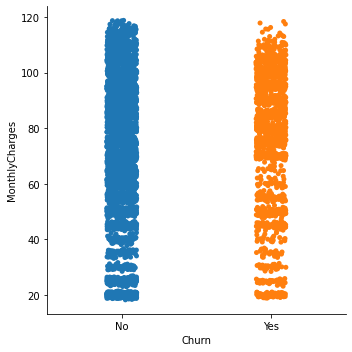

In [311]:
sns.catplot(x='Churn',y='MonthlyCharges', data=data)

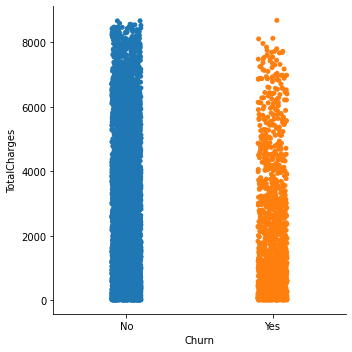

In [312]:
sns.catplot(x='Churn', y='TotalCharges', data= data)

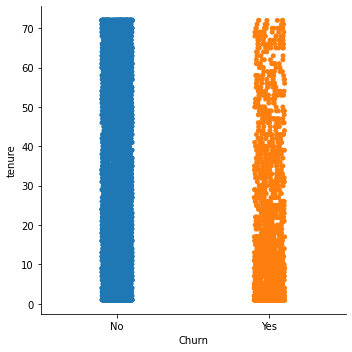

In [313]:
sns.catplot(x='Churn', y='tenure', data=data)

In [314]:
#resetting the index so that there wont be any prob while merging different dataframes
data.reset_index(drop=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


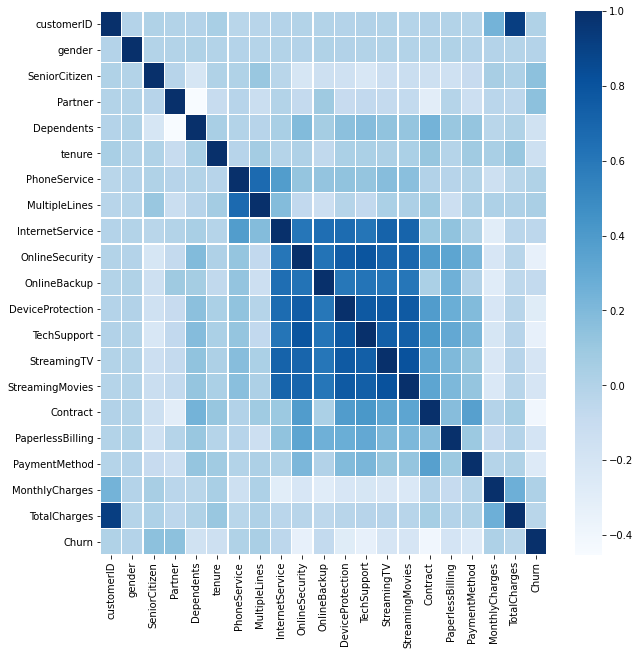

In [315]:
#Correlation matrix for all the features
plt.figure(figsize=(10,10))
corr_mat = data.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr_mat, xticklabels=corr_mat.columns, yticklabels=corr_mat.columns, linewidths=.2, cmap='Blues')

In [0]:
#@title TotalCharges shows a very high correlation with customerID. We can drop customerID hence. Also it does not seem to be a important feature for the model.

In [0]:
#@title Feature Engineering

In [318]:
list(data)

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [0]:
#Converting the 'Churn' feature values to 0(No) and 1(Yes) 
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

# Label encoding for Gender feature
data['gender'] = data['gender'].map({'Male': 1, 'Female': 0})

#label encoding for other binary feature columns having Yes/No
B_list = ['Partner','Dependents','PhoneService','PaperlessBilling']
data[B_list] = data[B_list].replace({'Yes':1, 'No':0})


In [0]:
# One Hot Encoding for Categorical List(Having more than two options)

cat_list = ['MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport',
            'StreamingTV', 'StreamingMovies','Contract','PaymentMethod']
cat_onehotenc = pd.get_dummies(data[cat_list])

In [0]:
# Scaling of the Numeric columns using MinMax Scaling
num_list = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_list = pd.DataFrame(data=scaler.fit_transform(data[num_list]), columns = num_list)

In [322]:
scaled_list

,tenure,MonthlyCharges,TotalCharges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310
3,0.619718,0.239303,0.210241
4,0.014085,0.521891,0.015330
...,...,...,...
7027,0.323944,0.662189,0.227521
7028,1.000000,0.845274,0.847461
7029,0.140845,0.112935,0.037809
7030,0.042254,0.558706,0.033210


In [0]:
data1 = data.drop(columns=cat_list)
data1 = data1.drop(columns=num_list)
# merging the dataframes
data2 = pd.concat([data1, scaled_list, cat_onehotenc], axis=1)

In [324]:
data_fin = data2.drop(columns='customerID')
data_fin

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,tenure,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0,1,0,0.000000,0.115423,0.001275,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,1,0,0,0.464789,0.385075,0.215867,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,1,1,1,0.014085,0.354229,0.010310,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0.619718,0.239303,0.210241,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,1,1,1,0.014085,0.521891,0.015330,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,1,1,1,1,0,0.323944,0.662189,0.227521,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
7028,0,0,1,1,1,1,0,1.000000,0.845274,0.847461,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0
7029,0,0,1,1,0,1,0,0.140845,0.112935,0.037809,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
7030,1,1,1,0,1,1,1,0.042254,0.558706,0.033210,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1


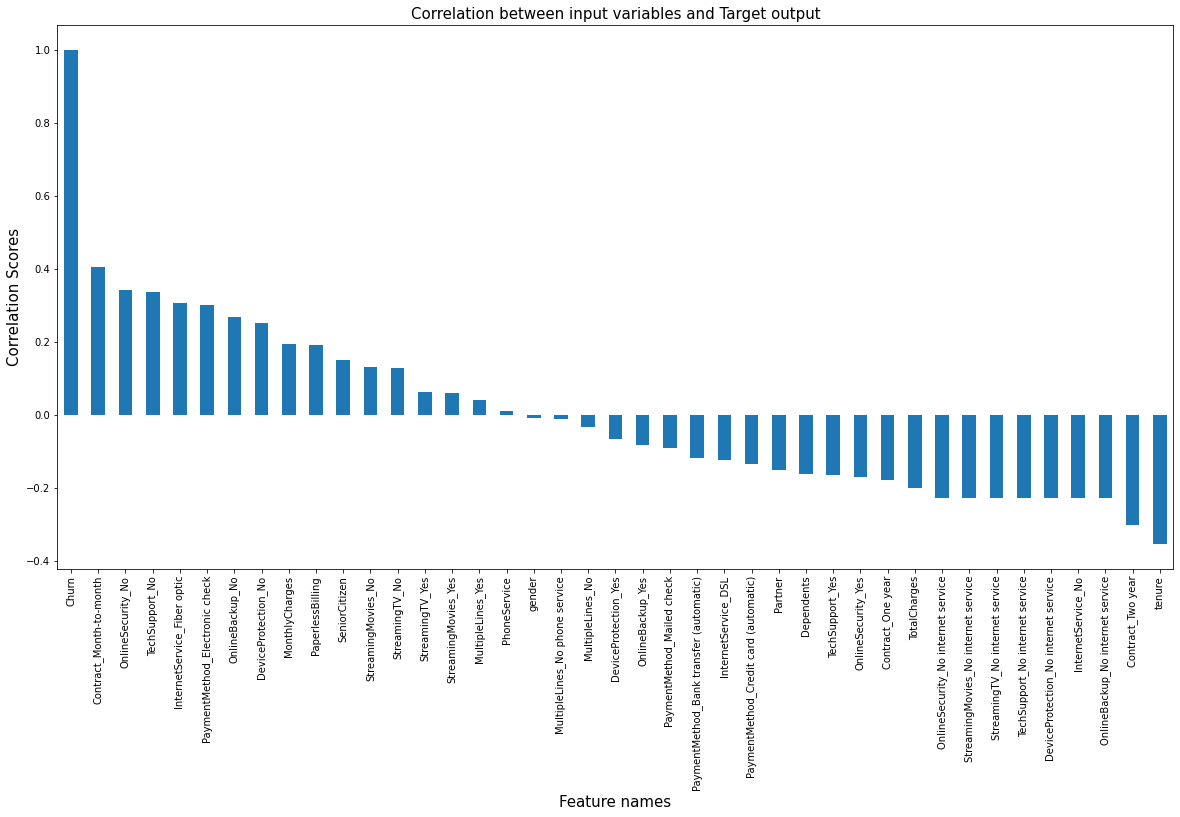

In [325]:
#Plotting the Bar Plot to show the correlations between input variables and target output 'Churn'
plt.figure(figsize=(20,10))
ax = data_fin.corr()['Churn'].sort_values(ascending = False)
ax.plot(kind='bar')
plt.title('Correlation between input variables and Target output', fontsize=15)
plt.xlabel("Feature names", fontsize=15)
plt.ylabel("Correlation Scores", fontsize=15)          
plt.xticks(rotation=90);

In [0]:
X = data_fin.drop(columns='Churn')
y = data_fin['Churn']

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [0]:
# Using Recursive Feature Elimination method for finding the best combination of features

#using Logistic Regression and using L2 regularization as penalty 
estimator = LogisticRegression(penalty='l2',solver='lbfgs',max_iter=1000)

# using the n_features_to_select as default
rfe = RFE(estimator,step=1)
rfe_fit=rfe.fit(X,y)

In [329]:
rfe_fit.support_

array([False,  True, False,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True, False,  True, False, False,
        True,  True, False, False,  True, False,  True, False, False,
       False, False,  True, False, False,  True,  True, False,  True,
       False, False,  True, False])

In [330]:
#Total features selected by RFE method
rfe_fit.n_features_

20

In [0]:
df1_features = pd.DataFrame(rfe_fit.support_)
df1_columns = pd.DataFrame(X.columns)
df1_ranks = pd.DataFrame(rfe_fit.ranking_)
featureScores_rfe = pd.concat([df1_columns,df1_features,df1_ranks],axis=1)
featureScores_rfe.columns = ['features','Support', 'Ranking']

In [332]:
#Showing the strength of all the features 
featureScores_rfe 

,features,Support,Ranking
0,gender,False,18
1,SeniorCitizen,True,1
2,Partner,False,20
3,Dependents,True,1
4,PhoneService,True,1
5,PaperlessBilling,True,1
6,tenure,True,1
7,MonthlyCharges,True,1
8,TotalCharges,True,1
9,MultipleLines_No,True,1


In [333]:
#Selecting only those features where it is marked True in the Support column and the Ranking is 1
rfe_fea = featureScores_rfe[featureScores_rfe['Support']]
rfe_fea

,features,Support,Ranking
1,SeniorCitizen,True,1
3,Dependents,True,1
4,PhoneService,True,1
5,PaperlessBilling,True,1
6,tenure,True,1
7,MonthlyCharges,True,1
8,TotalCharges,True,1
9,MultipleLines_No,True,1
12,InternetService_DSL,True,1
13,InternetService_Fiber optic,True,1


In [0]:
#@title Finalising all the 20 features whose support value was true

In [335]:
final_feature_list = list(rfe_fea['features'])
final_df = X[final_feature_list]
list(final_df)

['SeniorCitizen',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'MultipleLines_No',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'OnlineSecurity_No',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'DeviceProtection_No internet service',
 'TechSupport_No',
 'StreamingTV_Yes',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_Two year',
 'PaymentMethod_Electronic check']

In [0]:
from sklearn.model_selection import train_test_split

In [0]:

# y = data_fin['Churn'] this is just for reference as it is already assigned before

X_train, X_test, y_train, y_test = train_test_split(final_df, y, test_size=0.2, random_state=0)

#converting the pandas dataframes into numpy matrices
# X_train, X_test=np.array(X_train), np.array(X_test)
# y_train, y_test=np.array(y_train), np.array(y_test)

In [0]:
# Create data structures needing for training and testing.
# The training data doesn't contain the column we are predicting,
# 'COMPASS_determination', or the column we are using for evaluation of our
# trained model, 'recidivism_within_2_years'.
df_for_training = X_train
train_size = int(len(df_for_training) * 0.8)

train_data = df_for_training[:train_size]

#labels are o or 1 [low - 0, otherwise 1]
labels = y_train
train_labels = labels[:train_size]


#need to check this after first round of implementation
# = np.r_[X_train, X_test]

In [0]:
# Create the model

# This is the size of the array we'll be feeding into our model for each example
input_size = len(train_data.iloc[0])

model = Sequential()
model.add(Dense(200, input_shape=(input_size,), activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer='adam')

In [340]:
# Train the model
model.fit(train_data.values, train_labels.values, epochs=4, batch_size=32, validation_split=0.1)

Epoch 1/4
127/127 [==============================] - 0s 3ms/step - loss: 0.1558 - val_loss: 0.1440
Epoch 2/4
127/127 [==============================] - 0s 2ms/step - loss: 0.1370 - val_loss: 0.1362
Epoch 3/4
127/127 [==============================] - 0s 2ms/step - loss: 0.1353 - val_loss: 0.1411
Epoch 4/4
127/127 [==============================] - 0s 2ms/step - loss: 0.1348 - val_loss: 0.1401


In [0]:
# Create a SHAP explainer by passing a subset of our training data
explainer = shap.DeepExplainer(model, train_data.values[:200])

In [342]:
# Explain predictions of the model on the first 5 examples from our training set
# to test the SHAP explainer.
shap_values = explainer.shap_values(train_data.values[:50])
shap_values


[array([[-9.22545497e-03,  9.11275528e-03, -1.53952306e-03,
          8.40939676e-03,  4.44823539e-03,  2.05738385e-03,
          9.39465139e-03,  1.73613544e-02, -5.38068867e-02,
         -3.84347466e-02, -1.18435211e-02,  3.87933961e-03,
          1.00472234e-02,  6.24256927e-03, -3.84697035e-02,
         -8.50546310e-03, -1.94253830e-02, -4.98166976e-02,
          1.48248936e-02,  4.41340357e-02],
        [-2.63751540e-03, -2.08343682e-02, -1.03208728e-03,
         -1.87313468e-02, -7.57482651e-02, -1.09052760e-02,
         -3.95825232e-02,  9.84063857e-03,  1.78767669e-02,
          1.74504823e-02, -6.05529592e-03, -9.23347486e-03,
          4.68870630e-03,  3.50275415e-03, -1.83842041e-02,
          9.78363447e-03,  1.63562808e-02, -2.64355829e-02,
         -4.76337584e-02, -1.36632155e-02],
        [-2.29790684e-03, -1.48436940e-02, -5.43354640e-04,
         -1.11178940e-02, -5.91570288e-02,  6.90877946e-03,
          1.09011196e-05,  5.87935027e-03,  1.07422437e-02,
         -1.44702410e-02, -1.89880967e-03, -2.56664934e-03,
         -2.80259767e-02, -1.85285762e-02, -1.37761873e-02,
         -2.89241688e-03, -5.59761069e-03, -2.44541974e-02,
         -3.84214022e-02, -1.08445295e-02],
        [-3.31453499e-03, -1.75469854e-02, -1.11122505e-03,
         -1.35612886e-02, -4.60018872e-02,  9.01693064e-03,
          5.29435039e-03, -8.26211552e-03,  1.45012122e-02,
         -1.82876837e-02, -5.18178392e-03, -6.76500442e-03,
         -3.30197674e-02, -1.97212497e-02, -1.45904246e-02,
         -3.85686793e-03, -6.36838677e-03, -3.64065330e-02,
          4.60919318e-03, -1.60179739e-02],
        [-1.14346801e-02,  1.55258111e-02, -1.78881560e-03,
          2.47687197e-02,  4.54764485e-02, -7.08268345e-03,
          8.22707713e-03,  1.86836303e-02,  5.63585303e-02,
          5.64389301e-02,  2.04211978e-02,  9.99731142e-03,
          1.97460284e-02,  8.90988318e-03,  4.52032697e-02,
          3.09221963e-02, -3.19236422e-02,  4.23936074e-02,
          3.22236353e-02, -3.75500437e-02],
        [-5.40853427e-03, -2.83260845e-02, -1.15708854e-03,
         -2.69267127e-02,  4.63211126e-02,  1.75503785e-02,
          2.00570580e-02, -9.95600809e-03,  2.84666775e-02,
         -3.19196823e-02, -1.24481042e-02, -1.52321053e-02,
         -4.51395505e-02, -3.67042032e-02, -3.04947619e-02,
         -2.60622050e-03, -9.91631558e-03, -6.20195463e-02,
          1.17523855e-02,  3.09800750e-02],
        [-5.82090874e-03,  8.22812744e-03, -1.59905862e-03,
         -2.00574341e-02,  5.81284243e-02,  1.53575268e-02,
          1.95311060e-02, -1.59116024e-02,  2.74342376e-02,
         -2.96146266e-02, -1.09094295e-02, -1.30822876e-02,
         -4.73362100e-02, -2.98109740e-02, -2.49622136e-02,
         -5.54082593e-03, -9.98496708e-03, -6.57695225e-02,
          1.15438570e-02, -2.38158068e-02],
        [-1.23700343e-02,  1.00882309e-02, -1.21753578e-03,
          2.71857395e-02,  3.17210815e-02, -5.63402410e-03,
          3.49029426e-03, -3.82004435e-02,  5.13392274e-02,
          5.92984148e-02,  1.67711546e-02,  1.44955258e-02,
          1.86492614e-02,  8.32163745e-03,  3.61566599e-02,
         -2.39043519e-02,  4.16969417e-02,  4.65420722e-02,
          3.14548254e-02, -3.99710417e-02],
        [ 5.17759631e-02,  1.16263388e-02,  1.75979276e-02,
         -4.74900886e-02, -4.45024794e-02,  8.63841028e-03,
          1.06241121e-02,  2.68575573e-02, -7.88273426e-02,
         -4.64233508e-02,  7.66673322e-04, -3.75016530e-02,
          9.88973193e-03,  7.35941152e-03,  3.18348076e-02,
         -9.64932598e-04, -1.62214137e-02,  2.93432403e-02,
          2.23622644e-02,  4.20630894e-02],
        [-6.98886778e-03,  8.78099545e-03, -1.29056812e-03,
          2.83594002e-02,  1.54488096e-01, -1.10198478e-02,
          4.23462577e-02, -3.27998041e-02,  5.00261855e-02,
          6.17903238e-02,  1.36909739e-02, -2.78613149e-02,
          1.55934212e-02,  1.18183430e-02,  4.13151375e-02,
         -1.12356698e-02, -2.04258157e-02,  5.15044663e-02,
    

In [343]:
print(np.shape(shap_values))

(1, 50, 20)


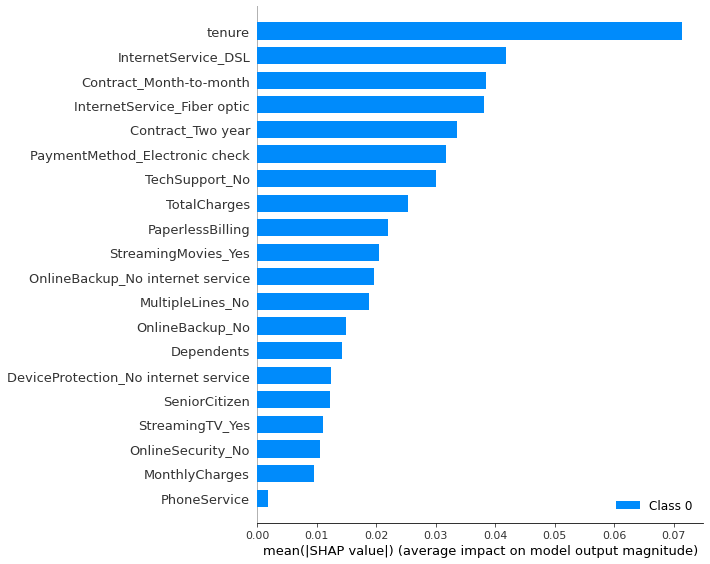

In [344]:
shap.summary_plot(shap_values, train_data, plot_type="bar")

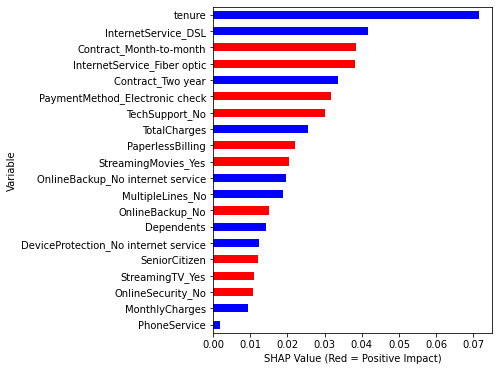

In [345]:
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(5,6),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")
    
ABS_SHAP(shap_values[0], train_data[:50])

In [346]:
list(train_data)

['SeniorCitizen',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'MultipleLines_No',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'OnlineSecurity_No',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'DeviceProtection_No internet service',
 'TechSupport_No',
 'StreamingTV_Yes',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_Two year',
 'PaymentMethod_Electronic check']

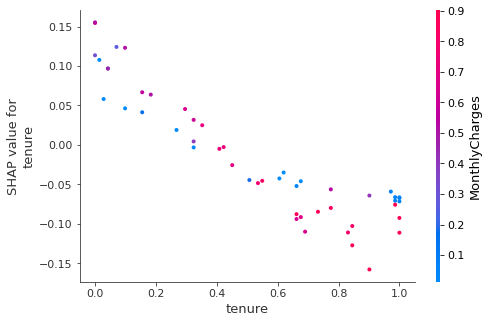

In [347]:
shap.dependence_plot('tenure', shap_values[0], train_data[:50])

In [0]:
#@title We can observe that, The function automatically includes another variable that your chosen variable interacts most with. The plot above shows there exists an approximately linear but negative relationship between “tenure” and the target variable. This negative relationship is already demonstrated in the variable importance plot Exhibit.“tenure” interacts with “MonthlyCharges” frequently

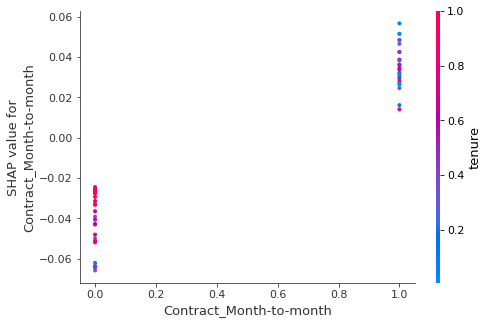

In [349]:
shap.dependence_plot('Contract_Month-to-month', shap_values[0], train_data[:50])

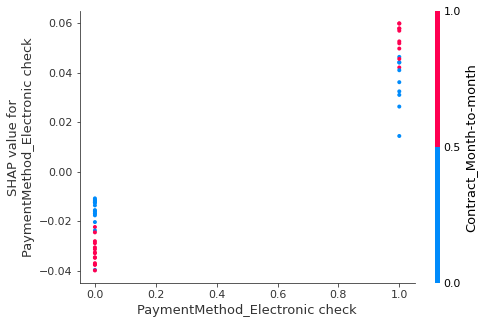

In [350]:
shap.dependence_plot('PaymentMethod_Electronic check', shap_values[0], train_data[:50])

In [0]:
#@title The features PaymentMethod_Electronic check and Monthly_Charges interact the most

In [0]:
#  predictions = model.predict([X_test])

In [353]:
# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')
results = model.evaluate(X_test, y_test, batch_size=128)
print('test loss, test acc:', results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print('\n# Generate predictions for 3 samples')
predictions = model.predict(X_test[:3])
print('predictions shape:', predictions.shape)


# Evaluate on test data
11/11 [==============================] - 0s 2ms/step - loss: 0.1386
test loss, test acc: 0.13861499726772308

# Generate predictions for 3 samples
predictions shape: (3, 1)


In [0]:
pred = model.predict(X_test)

In [355]:
#np.round(prob)
print("pred === ", pred)

pred ===  [[0.29350582]
 [0.13001505]
 [0.20234014]
 ...
 [0.7127038 ]
 [0.15578902]
 [0.49430192]]


In [0]:
predictions = np.round(pred)

In [357]:
print("pred === ", predictions)

pred ===  [[0.]
 [0.]
 [0.]
 ...
 [1.]
 [0.]
 [0.]]


In [358]:
print("length of validation set === ", len(X_test))

length of validation set ===  1407


In [359]:
labels = y_test
tf.math.confusion_matrix(
    labels, predictions, num_classes=None, weights=None, dtype=tf.dtypes.int32,
    name=None
)


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[930, 108],
       [176, 193]], dtype=int32)>

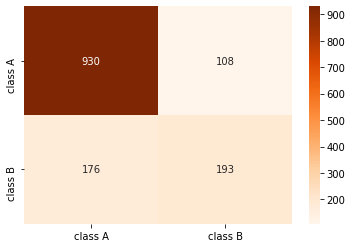

In [360]:

columns = ['class %s' %(i) for i in list(ascii_uppercase)[0:len(np.unique(labels))]]

confm = confusion_matrix(labels, predictions)
df_cm = DataFrame(confm, index=columns, columns=columns)

ax = sns.heatmap(df_cm, cmap='Oranges', annot=True, fmt='d')

In [361]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(labels, predictions)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(labels, predictions)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(labels, predictions)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(labels, predictions)
print('F1 score: %f' % f1)

Accuracy: 0.798152
Precision: 0.641196
Recall: 0.523035
F1 score: 0.576119


In [362]:
print(classification_report(labels,predictions))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1038
           1       0.64      0.52      0.58       369

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



if we look through the dataset available, For the feature column 'Churn', there is uneqal distribution of data for label 'Yes' and 'No'. To avoid the Target variable imbalance we can feed in more data to the model so that our model can train and learn the pattern for classifying Churn customer or Non Churn customer, much more efficiently. This could be done using SMOTE( synthetic minority Over-sampling Technique).

So our predictions are almost 81% accurate, i.e. we have identified 80% of the churn rate correctly. So with the final objective to reduce churn and take the right preventing actions in time, we want to know which independent variables have the most influence on our predicted outcome. Therefore we  use SHAP Library to indentify the features which impact positively to the model prediction.

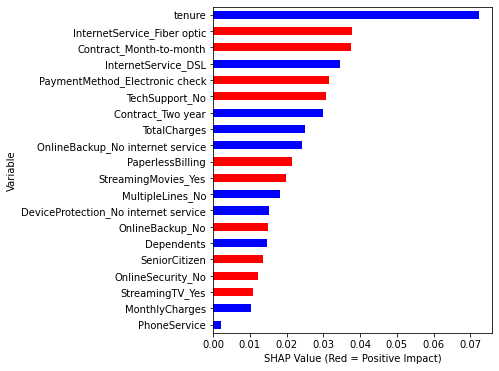

In [363]:
explainer = shap.DeepExplainer(model, X_test.values[:200])

# Explain predictions of the model on the first 5 examples from our training set
# to test the SHAP explainer.
shap_values = explainer.shap_values(X_test.values[:50])
shap_values
    
ABS_SHAP(shap_values[0], X_test[:50])

Customers with negative values(highlighted in blue) show that they are unlikely to churn while those with positive values(highlighted in red) shows they are likely to churn. These are the findings in my analysis.